In [8]:
import pandas as pd
d1 = [40,20,5,20,10,75,100,25,15,15,20,17,11,5]
d2=[35,40,7,23,20,26,12,30,27,102,18,17,14,7]

p1= pd.DataFrame(d1,columns=['points'])
p2= pd.DataFrame(d2,columns=['points'])
print(p1.describe(include = 'all'))
print(p2.describe(include = 'all'))
print(p1.cov())
print(p2.cov())

         points
count   14.0000
mean    27.0000
std     27.5318
min      5.0000
25%     12.0000
50%     18.5000
75%     23.7500
max    100.0000
           points
count   14.000000
mean    27.000000
std     23.709784
min      7.000000
25%     14.750000
50%     21.500000
75%     29.250000
max    102.000000
        points
points   758.0
            points
points  562.153846


In [ ]:
d1 = [40,20,5,20,10,75,100,25,15,15,20,17,11,5]
d2=[35,40,7,23,20,26,12,30,27,102,18,17,14,7]

p1= pd.DataFrame(d1,columns=['points'])
p2= pd.DataFrame(d2,columns=['points'])
print(p1.describe(include = 'all'))
print(p2.describe(include = 'all'))

In [9]:
import os as os
os.getcwd()
os.chdir('C:\\Users\\Aneetha\\Desktop\\knowledge-base\\Inceptz_DS\\source')

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
df =pd.DataFrame(iris.data)

In [4]:
df = pd.read_csv('iris.csv' ,index_col= 'Id')
# print(df)
print(df.describe())
print(df.cov())
print(df.corr())

FileNotFoundError: File b'iris.csv' does not exist

In [51]:
df['Sepal Length (cm)'].sample(5)

Id
45     5.1
26     5.0
145    6.7
99     5.1
127    6.2
Name: Sepal Length (cm), dtype: float64

In [7]:
import random
random.sample(list(df['Sepal Length (cm)']),5)

KeyError: 'Sepal Length (cm)'

D:\python\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


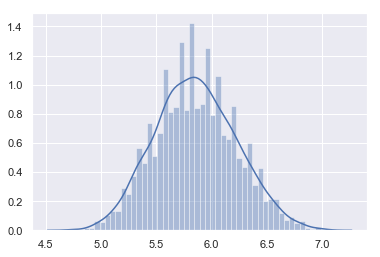

In [10]:
#Central Limit Theorem
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
df = pd.read_csv('iris.csv' ,index_col= 'Id')
clt =list()

for i in range(1,10000):
    mean= np.mean(df['Sepal Length (cm)'].sample(5))
    clt.append(mean)
sns.distplot(clt)


In [11]:
import statistics as stat
print(stat.mean(clt))
print(stat.mode(clt))
print(stat.median(clt))
print(stat.stdev(clt))
print(stat.pstdev(clt))
print(stat.variance(clt))

5.853477347734773
5.92
5.84
0.3685934772784573
0.36857504530058466
0.13586115149222464


In [16]:
import numpy as np
print(np.random.seed(42))

None


In [22]:
male=np.random.normal(82,scale = 8, size = 6000)
female=np.random.normal(70,scale = 6, size = 6500)

In [25]:
all_weights = np.concatenate((male,female),axis =0 )

In [26]:
df= pd.DataFrame(data = {'weights':all_weights })

In [27]:
df.head()

,weights
0,73.087349
1,76.952553
2,74.463519
3,77.616033
4,80.286798


D:\python\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Weights in Kg')

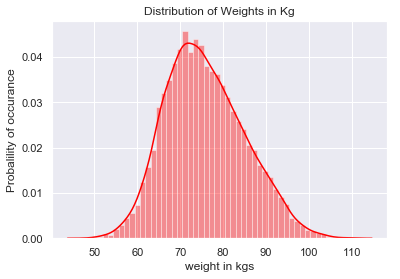

In [30]:
sns.distplot(df , color = 'red')
plt.xlabel('weight in kgs')
plt.ylabel('Probalility of occurance')
plt.title('Distribution of Weights in Kg')

In [95]:
n=25
sample_means = []
for sample in range(0,300):
    sample_val = np.random.choice(a= df['weights'] ,size =n) #with replacement to avoid bias
    sample_mean =np.mean(sample_val) 
    sample_means.append(sample_mean)

Text(0, 0.5, 'Freqeuncy')

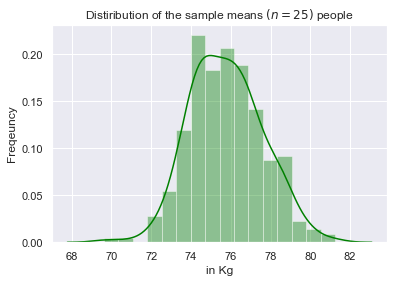

In [96]:
sns.distplot(sample_means, color ='green')
plt.title ("Distiribution of the sample means $(n=25)$ people")
plt.xlabel('in Kg')
plt.ylabel('Freqeuncy')

In [97]:
pmean=np.mean(sample_means)
print(np.mean(sample_means))
 
pmedian=np.median(sample_means)
print(np.median(sample_means)) 

pstd=np.std(sample_means)
print(np.std(sample_means))
 

75.7754563965326
75.62017444519216
1.8084881101589838


In [98]:
std_error = pstd/np.sqrt(n)
std_error

0.3616976220317968

In [99]:
gym_sample_mean =79

Text(0.5, 1.0, 'Distiribution of the sample means $(n=25)$ people')

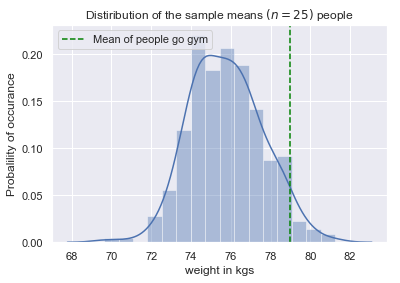

In [100]:
sns.distplot(sample_means)
plt.axvline(x=gym_sample_mean , linestyle = "dashed" , color = 'green' , label ='Mean of people go gym')
plt.legend()
plt.xlabel('weight in kgs')
plt.ylabel('Probalility of occurance')
plt.title ("Distiribution of the sample means $(n=25)$ people")

In [101]:
z_score =(gym_sample_mean- pmean) /std_error
z_score

8.91502572052831

In [102]:
import scipy.stats as stats
prop_less_than_gym_mean  =round(stats.norm.cdf(z_score) ,3)
prop_less_than_gym_mean

1.0

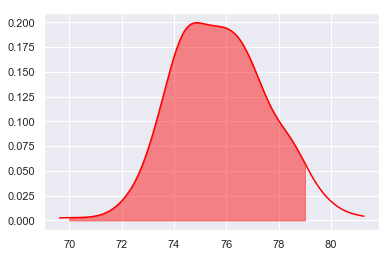

In [103]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means),np.max(sample_means),1000)
plt.plot(pos ,kde(pos),color="red")
shade = np.linspace(70,gym_sample_mean,300)
plt.fill_between(shade,kde(shade),alpha =0.45,color='red')